### Imprt Packages

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay
)
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

### Fetch the data

In [48]:
kdata = pd.read_csv(r"D:\Project4\kidney_disease.csv")
kdata.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


### Remove feature id as there is no impact

In [50]:
kdata = kdata.drop('id', axis=1)

In [52]:
kdata.shape

(400, 25)

### To check null values

In [54]:
kdata.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

### Description

In [56]:
kdata.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [58]:
pd.pandas.set_option('display.max_columns', None)
kdata.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


### New data

In [60]:
new_kdata = kdata

### Label Encoding

In [62]:
le = LabelEncoder()
new_kdata['rbc'] = le.fit_transform(new_kdata['rbc'])
new_kdata['pc'] = le.fit_transform(new_kdata['pc'])
new_kdata['pcc'] = le.fit_transform(new_kdata['pcc'])
new_kdata['ba'] = le.fit_transform(new_kdata['ba'])
new_kdata['htn'] = le.fit_transform(new_kdata['htn'])
new_kdata['dm'] = le.fit_transform(new_kdata['dm'])
new_kdata['cad'] = le.fit_transform(new_kdata['cad'])
new_kdata['appet'] = le.fit_transform(new_kdata['appet'])
new_kdata['pe'] = le.fit_transform(new_kdata['pe'])
new_kdata['ane'] = le.fit_transform(new_kdata['ane'])
new_kdata['classification'] = le.fit_transform(new_kdata['classification'])
new_kdata.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0,0,0,0,0,0,0


### Data types

In [64]:
new_kdata.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int32
pc                  int32
pcc                 int32
ba                  int32
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                 int32
dm                  int32
cad                 int32
appet               int32
pe                  int32
ane                 int32
classification      int32
dtype: object

### Converting Object to numeric

In [66]:
new_kdata['pcv'] = pd.to_numeric(new_kdata['pcv'], errors='coerce')
new_kdata['wc'] = pd.to_numeric(new_kdata['wc'], errors='coerce')
new_kdata['rc'] = pd.to_numeric(new_kdata['rc'], errors='coerce')

In [68]:
new_kdata.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int32
pc                  int32
pcc                 int32
ba                  int32
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                 int32
dm                  int32
cad                 int32
appet               int32
pe                  int32
ane                 int32
classification      int32
dtype: object

### Handling Null data

In [70]:
for col in new_kdata.columns:
    new_kdata[col] = new_kdata[col].fillna(new_kdata[col].median())
new_kdata.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


### To check Outliers

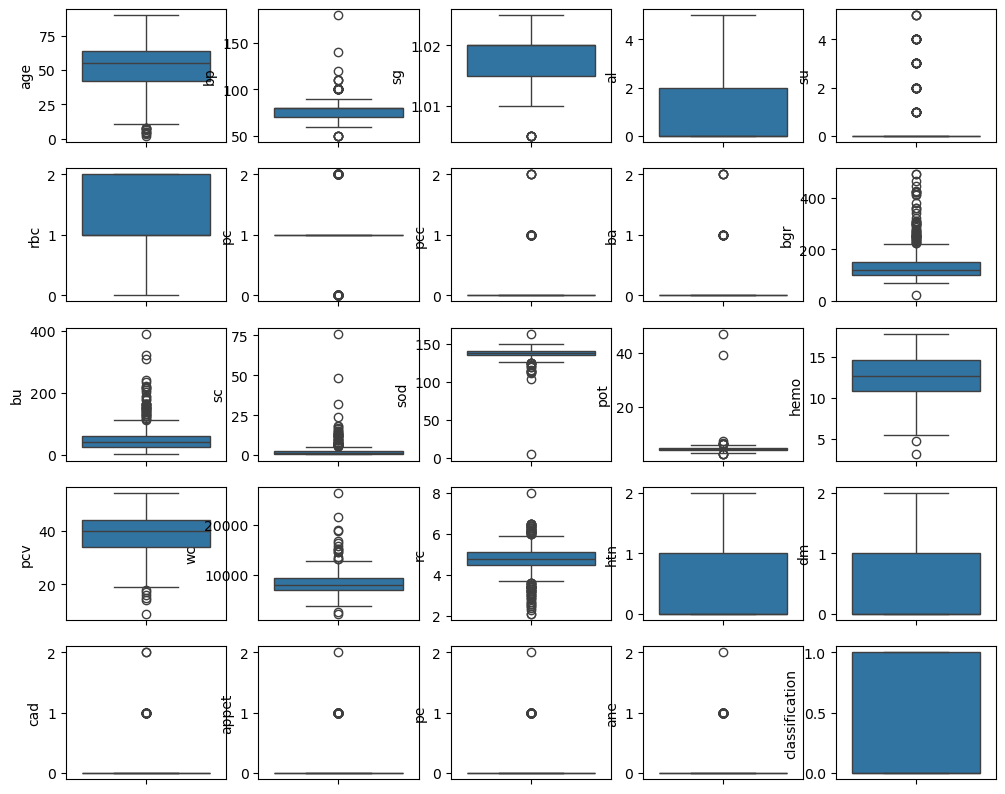

<Figure size 640x480 with 0 Axes>

In [72]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12,10))
axes = axes.flatten()

for ax, col in zip(axes,new_kdata.columns):
    sns.boxplot(new_kdata[col], ax=ax)

for ax in axes[len(new_kdata.columns):]:
    ax.set_visible(False)

plt.show()
plt.tight_layout()

### To get Outlier columns

In [74]:
outlier_cols = []

for col in new_kdata.columns:
    Q1 = new_kdata[col].quantile(0.25)
    Q3 = new_kdata[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # check if any values are outside bounds
    if ((new_kdata[col] < lower) | (new_kdata[col] > upper)).any():
        outlier_cols.append(col)

outlier_cols

['age',
 'bp',
 'sg',
 'su',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'cad',
 'appet',
 'pe',
 'ane']

### Handling Outliers with log trasformation

In [76]:
for col in outlier_cols:
    # Shift column if needed
    if (new_kdata[col] <= 0).any():
        new_kdata[col] = new_kdata[col] - new_kdata[col].min() + 1
        
    new_kdata[col] = np.log(new_kdata[col])
   
new_kdata

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,3.871201,4.382027,0.019803,1.0,0.000000,2,0.693147,0.000000,0.0,4.795791,3.583519,0.182322,4.927254,1.481605,2.734368,3.784190,8.961879,1.648659,1,1,0.0,0.000000,0.000000,0.000000,0
1,1.945910,3.912023,0.019803,4.0,0.000000,2,0.693147,0.000000,0.0,4.795791,2.890372,-0.223144,4.927254,1.481605,2.424803,3.637586,8.699515,1.568616,0,0,0.0,0.000000,0.000000,0.000000,0
2,4.127134,4.382027,0.009950,2.0,1.386294,1,0.693147,0.000000,0.0,6.047372,3.970292,0.587787,4.927254,1.481605,2.261763,3.433987,8.922658,1.568616,0,1,0.0,0.693147,0.000000,0.693147,0
3,3.871201,4.248495,0.004988,4.0,0.000000,1,0.000000,0.693147,0.0,4.762174,4.025352,1.335001,4.709530,0.916291,2.415914,3.465736,8.809863,1.360977,1,0,0.0,0.693147,0.693147,0.693147,0
4,3.931826,4.382027,0.009950,2.0,0.000000,1,0.693147,0.000000,0.0,4.663439,3.258097,0.336472,4.927254,1.481605,2.451005,3.555348,8.895630,1.526056,0,0,0.0,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,4.007333,4.382027,0.019803,0.0,0.000000,1,0.693147,0.000000,0.0,4.941642,3.891820,-0.693147,5.010635,1.589235,2.753661,3.850148,8.809863,1.589235,0,0,0.0,0.000000,0.000000,0.000000,1
396,3.737670,4.248495,0.024693,0.0,0.000000,1,0.693147,0.000000,0.0,4.317488,3.433987,0.182322,4.948760,1.252763,2.803360,3.988984,8.961879,1.824549,0,0,0.0,0.000000,0.000000,0.000000,1
397,2.484907,4.382027,0.019803,0.0,0.000000,1,0.693147,0.000000,0.0,4.605170,3.258097,-0.510826,4.919981,1.481605,2.760010,3.891820,8.794825,1.686399,0,0,0.0,0.000000,0.000000,0.000000,1
398,2.833213,4.094345,0.024693,0.0,0.000000,1,0.693147,0.000000,0.0,4.736198,3.912023,0.000000,4.905275,1.589235,2.653242,3.931826,8.881836,1.774952,0,0,0.0,0.000000,0.000000,0.000000,1


### Features and Target

In [80]:
A = new_kdata.drop(['classification'], axis=1)
b = new_kdata['classification']

### SMOTE Technique

In [82]:
smote = SMOTETomek()
A_smote, b_smote = smote.fit_resample(A,b)

### Split Test and Train

In [84]:
A_train,A_test,b_train,b_test = train_test_split(A_smote,b_smote, test_size=0.3, random_state=99)

### Logistic Regression CV

In [86]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=99))
])

param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Train model
grid.fit(A_train, b_train)

# Best model
best_logreg = grid.best_estimator_

# Predictions
b_pred = best_logreg.predict(A_test)
b_pred_prob = best_logreg.predict_proba(A_test)[:, 1]

# Metrics
accuracy_LR  = accuracy_score(b_test, b_pred)
precision_LR = precision_score(b_test, b_pred)
recall_LR    = recall_score(b_test, b_pred)
f1_LR        = f1_score(b_test, b_pred)
roc_auc_LR   = roc_auc_score(b_test, b_pred_prob)

print(f"Accuracy      : {accuracy_LR:.4f}")
print(f"Precision     : {precision_LR:.4f}")
print(f"Recall        : {recall_LR:.4f}")
print(f"F1 Score      : {f1_LR:.4f}")
print(f"AUC-ROC Score : {roc_auc_LR:.4f}")
print(classification_report(b_test, b_pred))

Accuracy      : 0.9667
Precision     : 0.9437
Recall        : 0.9853
F1 Score      : 0.9640
AUC-ROC Score : 0.9964
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        82
           1       0.94      0.99      0.96        68

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



### Pickle file

In [88]:
import pickle
filename = 'kidney_model.pkl'
pickle.dump(grid.best_estimator_, open(filename, 'wb'))

### EDA 

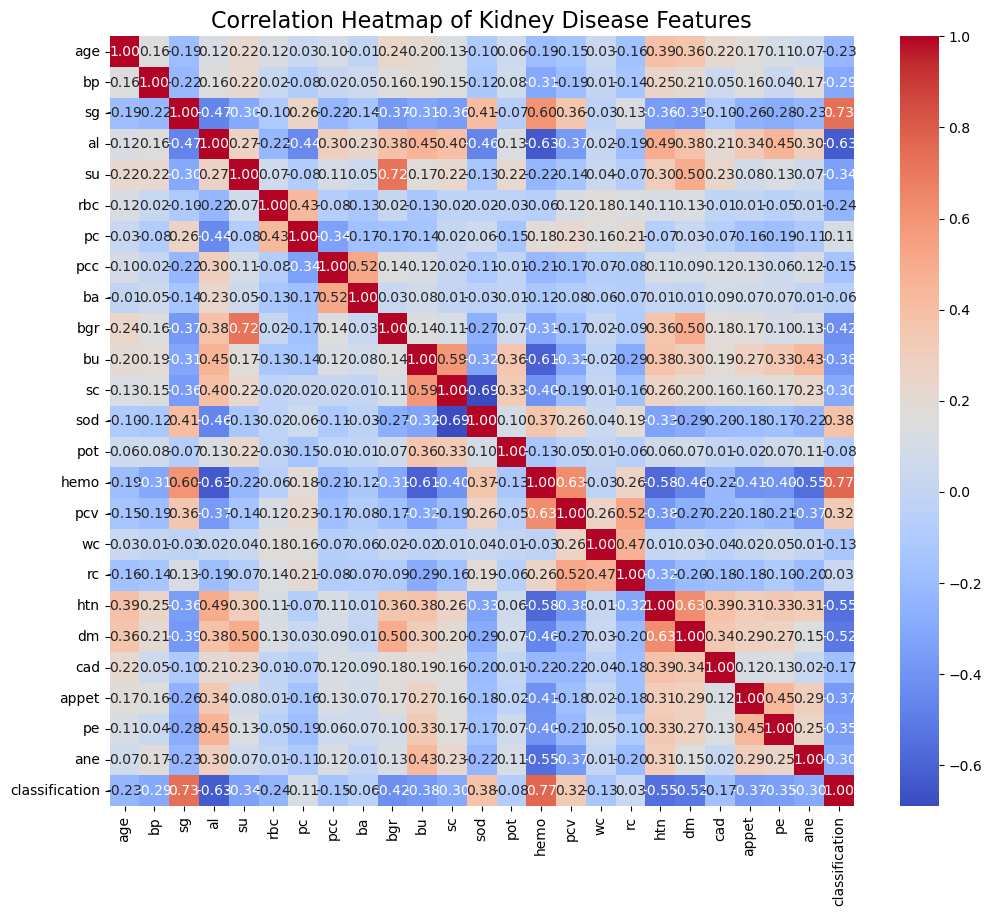

In [91]:
# Load dataset
kdata = pd.read_csv(r"D:\Project4\kidney_disease.csv")

# Drop ID column if present
if 'id' in kdata.columns:
    kdata = kdata.drop('id', axis=1)

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = kdata.select_dtypes(include='object').columns
for col in categorical_cols:
    kdata[col] = le.fit_transform(kdata[col])

# Compute correlation matrix
corr_matrix = kdata.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Kidney Disease Features", fontsize=16)
plt.show()